# Use Detail Age to Predict

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

'5.3.0-Mortality-Model_1_4恶性肿瘤detail age.ipynb'
 558_Assignments_Code
 5-Mortality-Model_1_22.ipynb
 data
'Fondation Final Project_Mortality'
'Foundation Financial Project.ipynb'
 Kaggle
 my_own_code
'powerful word.ipynb'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

# Model Data Set Generating - mdl_data

In [121]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = '/content/drive/My Drive/Colab Notebooks/Fondation Final Project_Mortality/data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [13]:
df[0][:2]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13


In [122]:
'''drop unused columns'''
'''Used ones: Year, detail_age, Sex, Race, rankable_cause_recode，month_of_death，'marital_status' '''
#use year,sex,race,age_band, cause_recode
unused_cols = ['education_1989_revision','education_2003_revision','education_reporting_flag',
               'day_of_week_of_death','injury_at_work', 'manner_of_death', 'activity_code','5y_age_band_recode']
for i in range(11):
    df[i].drop(unused_cols, axis=1, inplace=True)
    print(df[i].columns.values)

['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_ban

In [0]:
mdl_data = df[0]
for i in range(1,11):
  mdl_data = pd.concat([mdl_data,df[i]], axis=0)
#print(mdl_data['current_data_year'].unique())
del df

In [0]:
mdl_data = mdl_data[mdl_data['rankable_cause_recode'].isin([4])]

In [125]:
mdl_data

,month_of_death,sex,marital_status,current_data_year,race,5y_age_band_recode,rankable_cause_recode
0,1,F,M,2005,1,10,4
4,1,F,M,2005,1,14,4
9,1,F,W,2005,1,18,4
11,1,M,M,2005,2,16,4
13,1,M,M,2005,1,10,4
...,...,...,...,...,...,...,...
2718167,12,F,S,2015,2,13,4
2718171,12,M,D,2015,28,12,4
2718179,12,M,D,2015,2,13,4
2718186,12,M,W,2015,1,17,4


In [18]:
'''Store unique value for each predictor'''

'''year = mdl_data['current_data_year'].unique()
sex = mdl_data['sex'].unique()
race = sorted(mdl_data['race'].unique())
age = sorted(mdl_data['5y_age_band_recode'].unique())
cause = sorted(mdl_data['rankable_cause_recode'].unique())
print(year)
print(sex)
print(race)
print(age)
print(cause)'''

"year = mdl_data['current_data_year'].unique()\nsex = mdl_data['sex'].unique()\nrace = sorted(mdl_data['race'].unique())\nage = sorted(mdl_data['5y_age_band_recode'].unique())\ncause = sorted(mdl_data['rankable_cause_recode'].unique())\nprint(year)\nprint(sex)\nprint(race)\nprint(age)\nprint(cause)"

In [0]:
gbydata = mdl_data.groupby(by=['sex', 'current_data_year', 'race', 'detail_age','month_of_death','marital_status']).size()

In [20]:
gbydata.values

array([3, 2, 2, ..., 1, 1, 1])

In [0]:
x = []
for i in range(gbydata.size):
  x.append(list(gbydata.index.values[i]))
#x

In [22]:
mdl_data = pd.DataFrame(data=x, columns=['sex', 'current_data_year', 'race', 'detail_age','month_of_death','marital_status' ])
mdl_data['death_num'] = gbydata.values
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num
0,F,2005,1,1,1,S,3
1,F,2005,1,1,2,S,2
2,F,2005,1,1,3,S,2
3,F,2005,1,1,4,S,2
4,F,2005,1,1,5,S,4
...,...,...,...,...,...,...,...
291533,M,2015,78,92,12,M,1
291534,M,2015,78,93,7,W,1
291535,M,2015,78,93,10,W,1
291536,M,2015,78,93,11,M,1


# Data Wrangling

In [23]:
mdl_data.describe()

,current_data_year,race,detail_age,month_of_death,death_num
count,291538.000000,291538.000000,291538.000000,291538.000000,291538.000000
mean,2010.124488,10.687643,64.423838,6.524326,21.709928
std,3.151977,19.903158,27.773483,3.457659,58.532839
min,2005.000000,1.000000,1.000000,1.000000,1.000000
25%,2007.000000,1.000000,51.000000,4.000000,1.000000
50%,2010.000000,2.000000,66.000000,7.000000,2.000000
75%,2013.000000,5.000000,80.000000,10.000000,13.000000
max,2015.000000,78.000000,999.000000,12.000000,531.000000


## death number distribution

In [24]:
mdl_data.groupby(by=['death_num']).size().sort_index(ascending=False)

death_num
531         1
529         1
526         1
525         1
523         1
        ...  
5        8028
4       11342
3       18943
2       37613
1      111822
Length: 522, dtype: int64

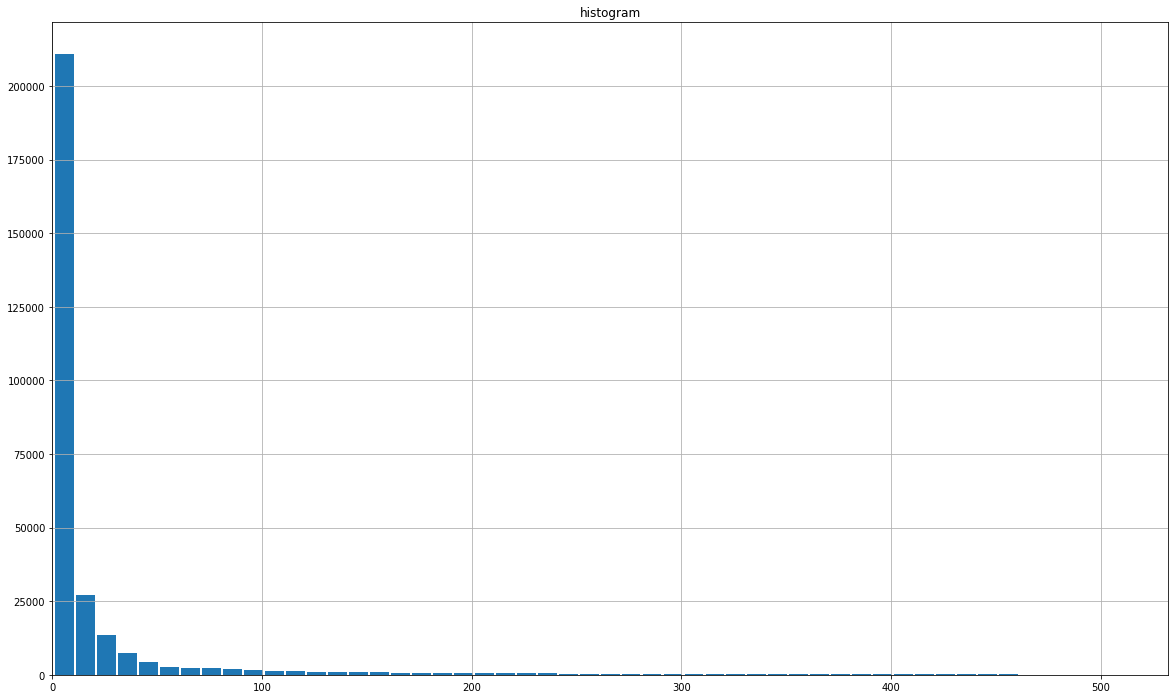

In [76]:
plt.figure(figsize=(20,12))
plt.hist(mdl_data['death_num'], bins=np.arange(1, 532,10), rwidth=0.9)
#plt.ylim(0,100)
plt.xlim(0,532)
plt.grid(axis='both')
plt.title("histogram")
plt.show()

## year, sex, race, age distribution

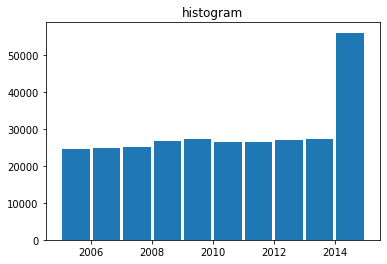

In [86]:
#year
#np.unique(mdl_data['current_data_year'])
plt.hist(mdl_data['current_data_year'], bins = np.arange(2004,2016), rwidth=0.9)
plt.title("histogram")
plt.xlim(2004.5,2015.5)
#plt.xticks(np.arange(2005,2017))
plt.show()

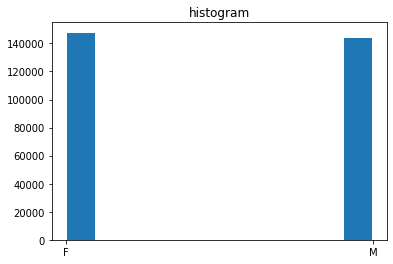

In [87]:
#sex
#np.unique(mdl_data['current_data_year'])
#binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['sex'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [93]:
np.unique(mdl_data['race'])

array([ 1,  2,  3,  4,  5,  6,  7, 18, 28, 38, 48, 58, 68, 78])

In [0]:
mdl_data['race_str'] = mdl_data['race'].astype(str)

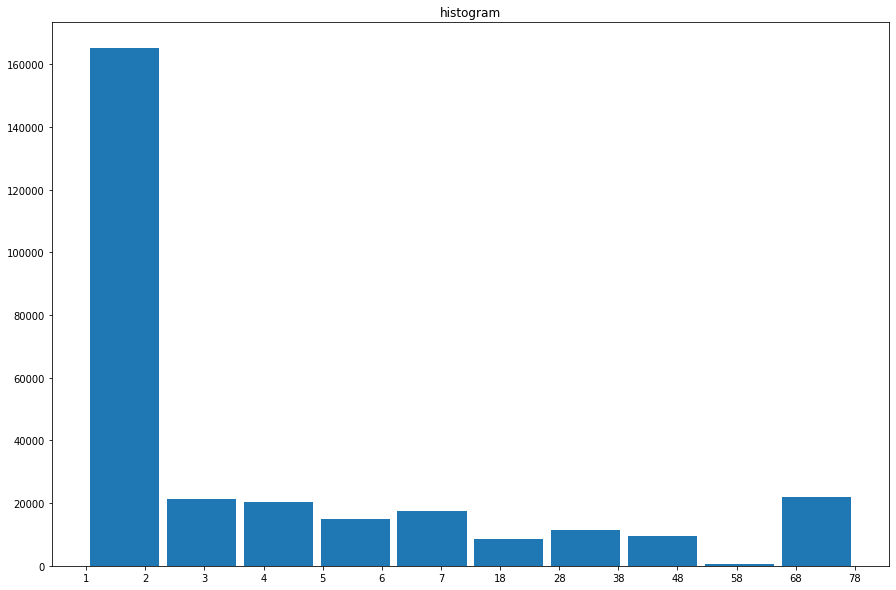

In [94]:
#race
#np.unique(mdl_data['sex'])
plt.figure(figsize=(15,10))
plt.hist(mdl_data['race_str'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(1,79))
plt.show()

In [95]:
np.unique(mdl_data['detail_age'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 126])

In [0]:
#drop data with 999 age
mdl_data = mdl_data[~mdl_data['detail_age'].isin([999])]
#mdl_data['detail_age'].unique()

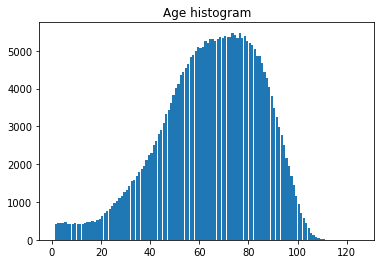

In [97]:
#gae
#np.unique(mdl_data['sex'])
plt.hist(mdl_data['detail_age'], bins=np.arange(1,126), rwidth=0.9)
plt.title("Age histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [0]:
mdl_data['month_str'] = mdl_data['month_of_death'].astype(str)

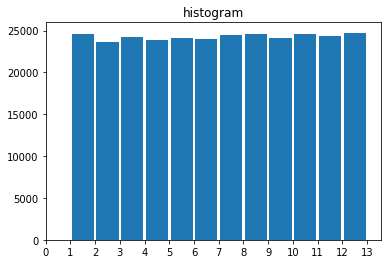

In [99]:
# month of death
plt.hist(mdl_data['month_of_death'], bins=np.arange(1,14), rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(14),('0','1','2','3','4','5','6','7','8','9','10','11','12','13'))
plt.xlim(left=0)
plt.show()

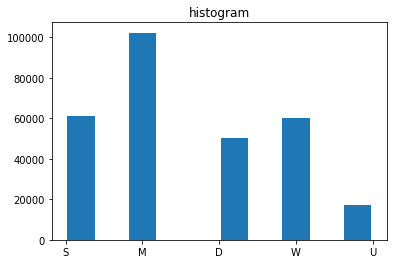

In [100]:
# marital_status
plt.hist(mdl_data['marital_status'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(5),('S', 'M','D','W','U'))
#plt.xlim(left=0)
plt.show()

# Relation Visualization



## current_data_year ~ death number

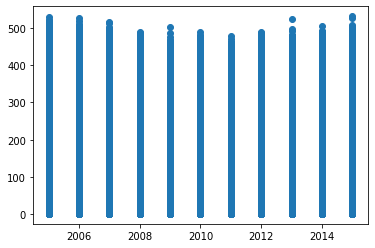

In [101]:
plt.scatter(mdl_data['current_data_year'], mdl_data['death_num'])
plt.show()

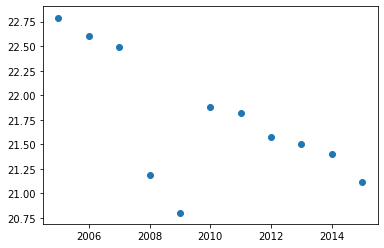

In [102]:
dnum_year = mdl_data[['current_data_year','death_num']].groupby('current_data_year').mean().reset_index()
plt.scatter(dnum_year['current_data_year'], dnum_year['death_num'])
plt.show()

## sex - death number relation


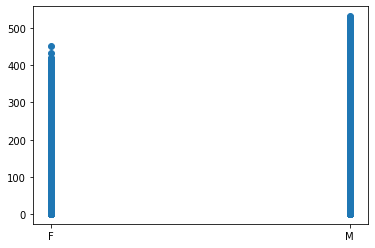

In [104]:
plt.scatter(mdl_data['sex'], mdl_data['death_num'])
plt.show()

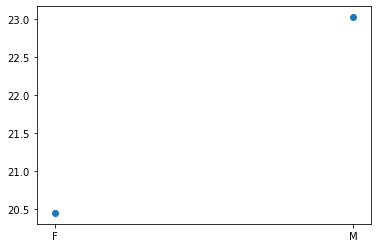

In [105]:
dnum_sex = mdl_data[['sex','death_num']].groupby('sex').mean().reset_index()
plt.scatter(dnum_sex['sex'], dnum_sex['death_num'])
plt.show()

## Race ~ Death Number
problem: unbalanced number of death for various race
  need a percentage data of each race to solve the problem.

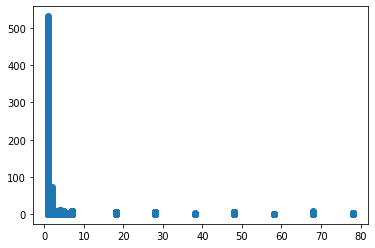

In [107]:
plt.scatter(mdl_data['race'], mdl_data['death_num'])
#x_labels = mdl_data['race'].unique().astype(str)
#plt.xticks()
plt.show()

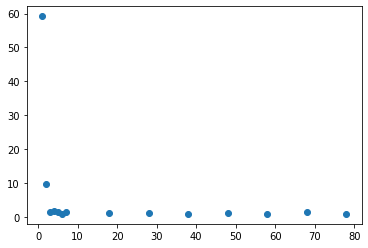

In [110]:
dnum_race = mdl_data[['race','death_num']].groupby('race').mean().reset_index()
plt.scatter(dnum_race['race'], dnum_race['death_num'])
#plt.ylim(0,10)
plt.show()

## Age ~ Death Number

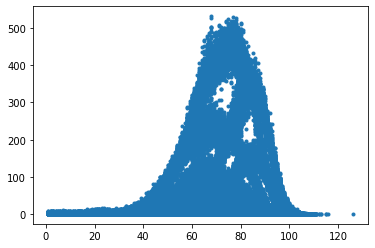

In [111]:
plt.scatter(mdl_data['detail_age'], mdl_data['death_num'], marker='.')
plt.show()

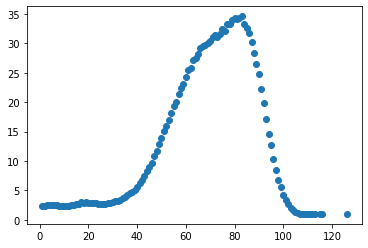

In [113]:
dnum_age = mdl_data[['detail_age','death_num']].groupby('detail_age').mean().reset_index()
plt.scatter(dnum_age['detail_age'], dnum_age['death_num'])
plt.show()

## Month ~ Death Number

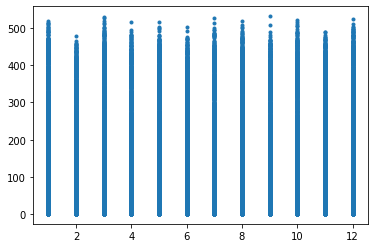

In [114]:
plt.scatter(mdl_data['month_of_death'], mdl_data['death_num'], marker='.')
plt.show()

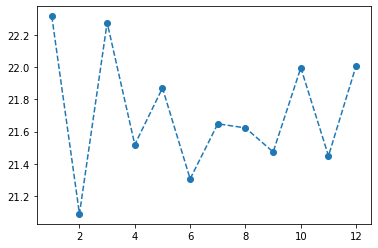

In [120]:
dnum_age = mdl_data[['month_of_death','death_num']].groupby('month_of_death').mean().reset_index()
plt.plot(dnum_age['month_of_death'], dnum_age['death_num'], '--o')
plt.show()

# Feature Engineering

In [119]:
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,pred1
0,F,2005,1,1,1,S,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.339295
1,F,2005,1,1,2,S,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.719934
2,F,2005,1,1,3,S,2,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7.259934
3,F,2005,1,1,4,S,2,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,6.987640
4,F,2005,1,1,5,S,4,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7.097629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291533,M,2015,78,92,12,M,1,78,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2.617969
291534,M,2015,78,93,7,W,1,78,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.436992
291535,M,2015,78,93,10,W,1,78,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.458045
291536,M,2015,78,93,11,M,1,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.562288


In [48]:
sex_onehot = pd.get_dummies(mdl_data['sex'],prefix='sex')
#mdl_data['racestr'] = mdl_data['race'].astype(str)
race_onehot = pd.get_dummies(mdl_data['race_str'],prefix='race')
month_onehot = pd.get_dummies(mdl_data['month_str'],prefix='month')
marital_onehot = pd.get_dummies(mdl_data['marital_status'], prefix='marital')
mdl_data = pd.concat([mdl_data, sex_onehot, race_onehot, month_onehot, marital_onehot], axis=1)
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W
0,F,2005,1,1,1,S,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,F,2005,1,1,2,S,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,F,2005,1,1,3,S,2,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,F,2005,1,1,4,S,2,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,F,2005,1,1,5,S,4,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291533,M,2015,78,92,12,M,1,78,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
291534,M,2015,78,93,7,W,1,78,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
291535,M,2015,78,93,10,W,1,78,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
291536,M,2015,78,93,11,M,1,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Modeling 1st Try

In [49]:
mdl_data.columns

Index(['sex', 'current_data_year', 'race', 'detail_age', 'month_of_death',
       'marital_status', 'death_num', 'race_str', 'month_str', 'sex_F',
       'sex_M', 'race_1', 'race_18', 'race_2', 'race_28', 'race_3', 'race_38',
       'race_4', 'race_48', 'race_5', 'race_58', 'race_6', 'race_68', 'race_7',
       'race_78', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'marital_D', 'marital_M', 'marital_S', 'marital_U',
       'marital_W'],
      dtype='object')

In [50]:
X=mdl_data[['current_data_year', 'detail_age', 
        'sex_F', 'sex_M', 'race_1', 'race_18', 'race_2', 'race_28',
       'race_3', 'race_38', 'race_4', 'race_48', 'race_5', 'race_58', 'race_6',
       'race_68', 'race_7', 'race_78', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'marital_D', 'marital_M', 'marital_S',
       'marital_U', 'marital_W']]
y=mdl_data['death_num']
X=sm.add_constant(X)
X

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,current_data_year,detail_age,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W
0,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291533,1.0,2015,92,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
291534,1.0,2015,93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
291535,1.0,2015,93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
291536,1.0,2015,93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
model_1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              death_num   No. Observations:               291420
Model:                            GLM   Df Residuals:                   291388
Model Family:                 Poisson   Df Model:                           31
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3727e+06
Date:                Fri, 29 Nov 2019   Deviance:                   5.7662e+06
Time:                        23:25:22   Pearson chi2:                 5.81e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.3868      0.13

In [52]:
mdl_data['pred1'] = model_1.predict(X)
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,pred1
0,F,2005,1,1,1,S,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.339295
1,F,2005,1,1,2,S,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.719934
2,F,2005,1,1,3,S,2,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7.259934
3,F,2005,1,1,4,S,2,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,6.987640
4,F,2005,1,1,5,S,4,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7.097629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291533,M,2015,78,92,12,M,1,78,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2.617969
291534,M,2015,78,93,7,W,1,78,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.436992
291535,M,2015,78,93,10,W,1,78,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.458045
291536,M,2015,78,93,11,M,1,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.562288


In [53]:
print('In Sample MSE: {}'.format(metrics.mean_squared_error(mdl_data['death_num'], mdl_data['pred1'])))
print('In Sample R2: {}'.format(metrics.r2_score(mdl_data['death_num'], mdl_data['pred1'])))

In Sample MSE: 1892.0129369069562
In Sample R2: 0.4479575216635625


## Interpretion & Visualize

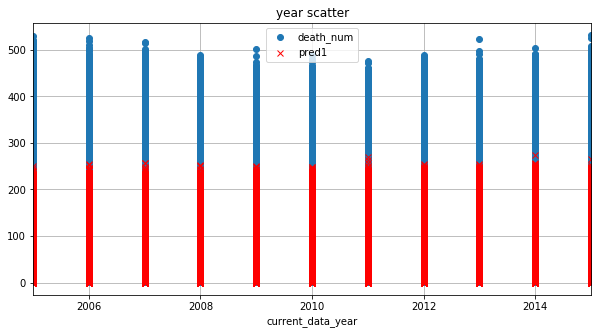

In [54]:
# Year
mdl_data.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('year scatter')
plt.show()

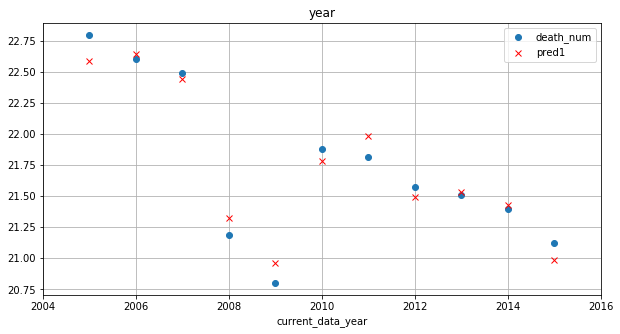

In [55]:
data_agg=mdl_data[['pred1','death_num', 'current_data_year']].groupby('current_data_year').mean().reset_index()
data_agg.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim(2004,2016)
plt.title('year')
plt.show()

In [0]:
# detail_age

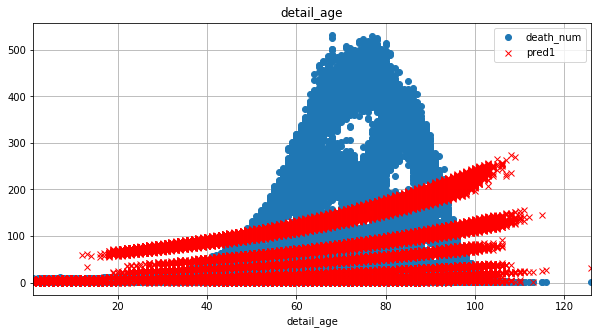

In [57]:
mdl_data.plot(x='detail_age', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('detail_age')
plt.show()

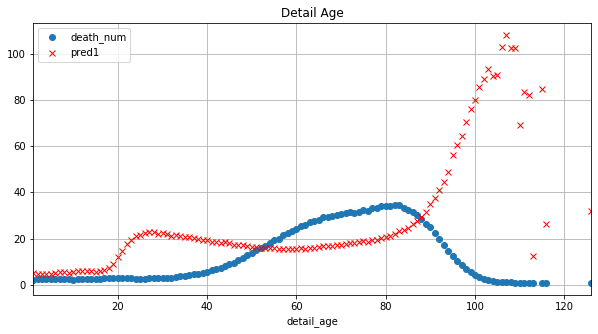

In [58]:
data_agg=mdl_data[['pred1','death_num', 'detail_age']].groupby('detail_age').mean().reset_index()
data_agg.plot(x='detail_age', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
#plt.xlim(2004,2016)
plt.title('Detail Age')
plt.show()

In [0]:
# Sex

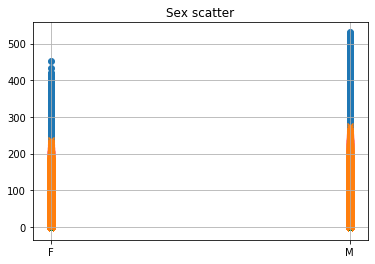

In [60]:
plt.scatter(x=mdl_data['sex'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['sex'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='sex', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Sex scatter')
plt.show()

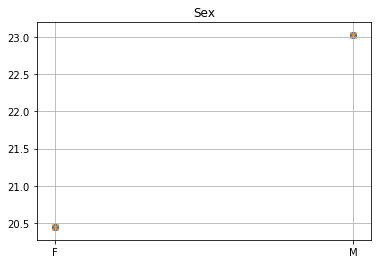

In [61]:
data_agg=mdl_data[['pred1','death_num', 'sex']].groupby('sex').mean().reset_index()
plt.scatter(x=data_agg['sex'], y=data_agg['death_num'])
plt.scatter(x=data_agg['sex'], y=data_agg['pred1'], marker='x')
plt.grid(axis='both')
plt.title('Sex')
plt.show()

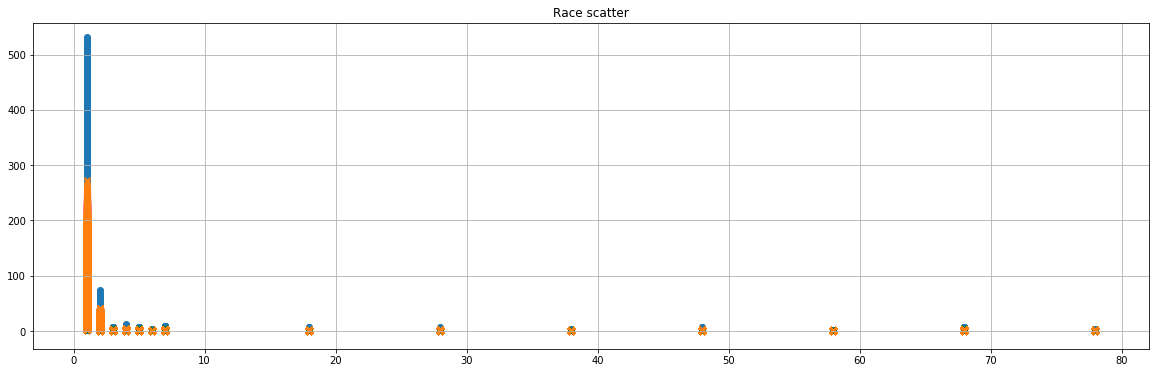

In [62]:
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['race'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['race'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

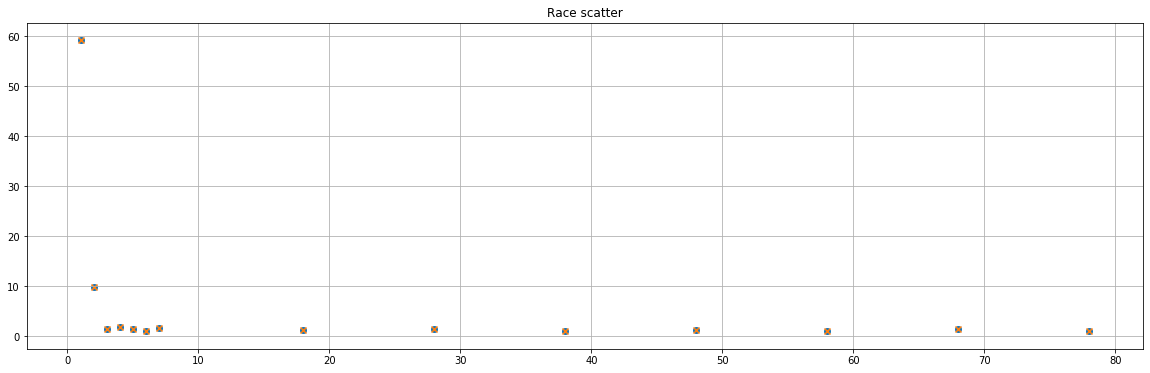

In [63]:
data_agg=mdl_data[['pred1','death_num', 'race']].groupby('race').mean().reset_index()
plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['race'], y=data_agg['death_num'])
plt.scatter(x=data_agg['race'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

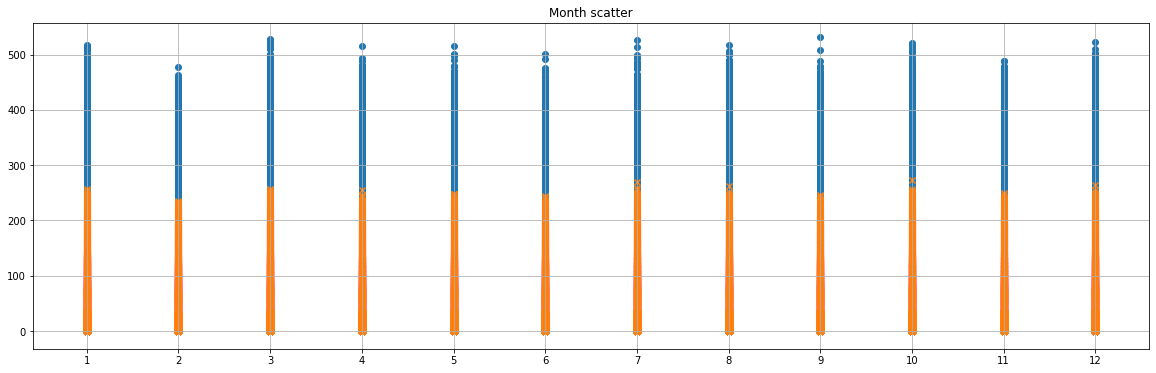

In [64]:
# Month of Death
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

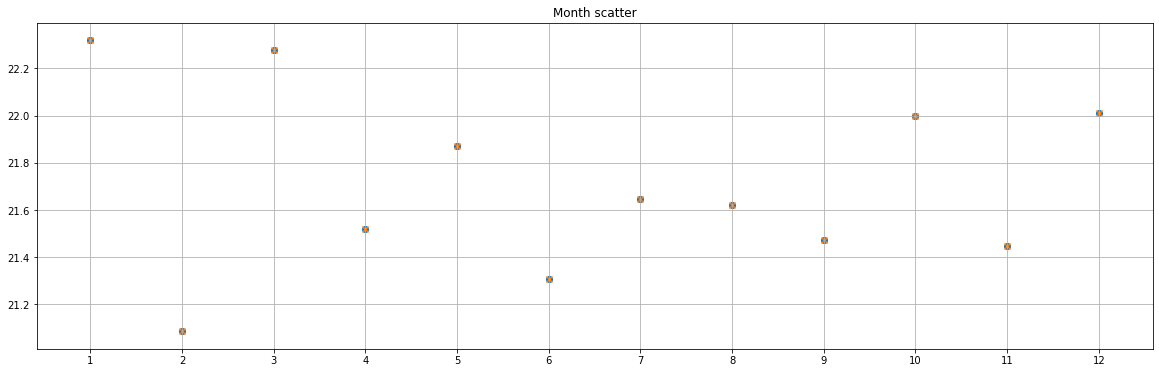

In [65]:
data_agg=mdl_data[['pred1','death_num', 'month_of_death']].groupby('month_of_death').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['month_of_death'], y=data_agg['death_num'])
plt.scatter(x=data_agg['month_of_death'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

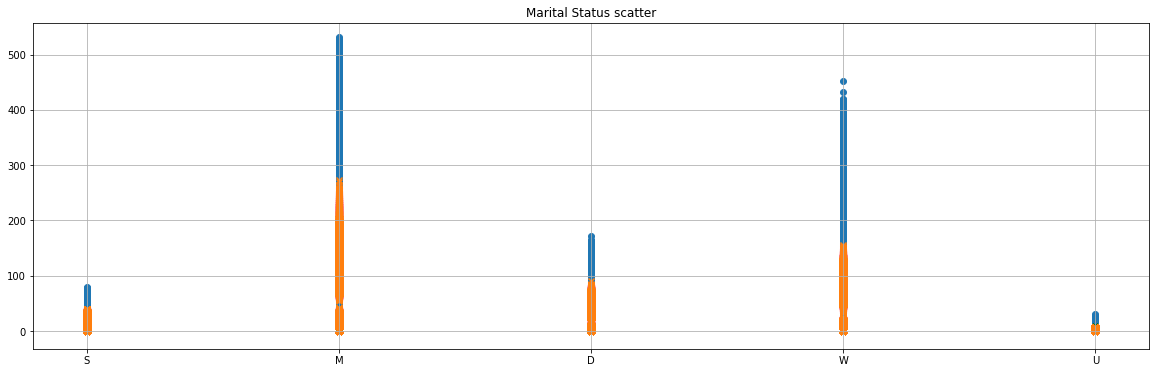

In [66]:
#marital Status
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('Marital Status scatter')
plt.show()

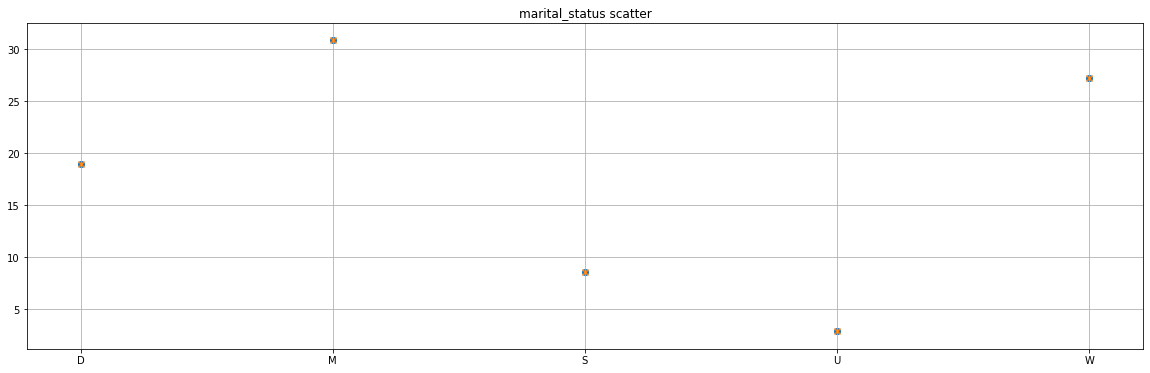

In [67]:
data_agg=mdl_data[['pred1','death_num', 'marital_status']].groupby('marital_status').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['marital_status'], y=data_agg['death_num'])
plt.scatter(x=data_agg['marital_status'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('marital_status scatter')
plt.show()